#**The Data Behind Music and What We Like to Hear**

**Priya Kalla, Kidus Yared, and Rajan Agarwal**



#**Table of Contents**

1. Introduction
2. Objective
3. Motivation
4. Data Sourcing and Info
5. Data Cleaning and Processing
6. Visualization and Exploratory Analysis
7. Machine Learning: Linear Regression
8. Machine Learning: Decision Trees
9. Conclusion/Final Thoughts

#**1. Introduction**

From the jingles you hear in commercials to the songs on the radio, music is everywhere around us. The impact music has is hard to put into words. It enhances stories and movies. It makes you want to dance. It makes you want to cry. It tells a story of culture and history and reflects the ever changing world around us. Music, itself, is so intricate and complex. Behind it there are so many different features that play into the popularity of each song and the emotions they make us feel. We should want to understand the influences of these features because they, collectively, make the music that impacts us. 

Spotify was one of the first music streaming services, and due to this, the amount of data that they obtain is unrivaled. Every year, millions of users use Spotify to stream all types of music. Over time, certain genres and artists have changed in levels of popularity, so we thought it would be interesting to take a deeper dive into some of the changes that have occurred over time. Spotify's allows to get an indepth look at the music and what different audio features make different music what it is. 


#**2. Objective**

The goal of this project was to be able to create a way to predict and analyze the valence and popularity of songs based off of past Spotify data. We will pull different elements and features of a song and see if we can analyze them to understand the relationships they have with popularity and valence. After getting a thorough understanding of these, we will then use machine learning to try to create regression models through which we can possibly predict popularity and valence based on different audio features. If popularity in music could be predicted, then theoretically music could be catered to fans more or optimal release windows could be determined for different types of music. Artists could have a better idea of what time of year their music would gain the most fans, and they could adjust their annual schedules accordingly. It also gives us an understanding of what people like to hear in their music. If valence could be predicted, we could get a better understanding of the music composition itself and how different aspects of music influence and are able to create certain moods. 

#**3. Our Motivation**

Between the three of us, we have about 500,000 minutes combined for our Spotify wrapped for this year. Having extensive backgrounds in music, we thought that this type of data would go well with what we are interested in. Seeing as music changes so greatly over time, it would also be fascinating to look at and see if, in fact, it is possible to predict such a thing like music popularity. Kidus Yared has a job as a dancer and DJ, and using this he would be able to predict some songs that would be up and coming which are also newer so are less likely to have been heard before. This could help him stand apart from the competition in his area, and put him at an advantage to get more bookings. Being able to predict trends in music also means that more details could be revealed as to if there is any cycle of sorts when it comes to what genres may rotate in and out of popularity. Music has changed a lot over the course of the pandemic, so we also wanted to see how this may affect popularity of certain songs, or what we observed personally in 2020 was different when compared with the data from past years. We felt that with the entertainment industry changing so much, and also the fact that streaming music has caused a difference in what people are willing to try out due to not purchasing individual songs, the prediction model would be able to be improved over time as the industry changes more as long as the data is updated.



# **4. Data Sourcing and Info**

We were able to source our data from Kaggle, more specifically at https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db. This data was able to span with songs from 1992 all the way through 2021. While the data does not span back this far, as Spotify was not founded until 2006, the data representing the songs can be representative of 2006 through the present in terms of trends being shown and such. The data being pulled from the Spotify API gives insight into many different categories. They are sorted as: “acousticness, danceability, energy, instrumentalness, liveness, loudness, speachiness, tempo, and valence.” For each of those, the scales and how they correspond are different. Such as “danceability” is described by Spotify as: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.” This is a bit more obscure than “loudness” for instance, which is measured standardly by decibels. Other elements are also available using the API like details about the track, such as the artist, release date, genre, and popularity. The genre is a standard text label, although the popularity scale is adjusted at different times, but is represented as on a scale between 0 and 100, with 100 representing a track being the “most popular.” All of the data categories that Spotify had to give are helpful in trying to make a prediction, although to use all of them is a lot to process, so we stuck with comparing more notable aspects such as genre or acousticness with popularity.

These are the definitions for the numeric audio features contained within our selected data set as described by the Spotify Web API Reference (https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features):

**Acousticness:**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability:**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Duration_ms:**
The duration of the track in milliseconds.

**Energy:**
A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness:**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Loudness:**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Speechiness:**
Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Tempo:**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence:**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
data = pd.read_csv("SpotifyFeatures.csv")
data

genre               artist_name  ... time_signature valence
0       Movie            Henri Salvador  ...            4/4   0.814
1       Movie         Martin & les fées  ...            4/4   0.816
2       Movie           Joseph Williams  ...            5/4   0.368
3       Movie            Henri Salvador  ...            4/4   0.227
4       Movie              Fabien Nataf  ...            4/4   0.390
...       ...                       ...  ...            ...     ...
232720   Soul                     Slave  ...            4/4   0.962
232721   Soul  Jr Thomas & The Volcanos  ...            4/4   0.969
232722   Soul              Muddy Waters  ...            4/4   0.813
232723   Soul                   R.LUM.R  ...            4/4   0.489
232724   Soul            Mint Condition  ...            4/4   0.479

[232725 rows x 18 columns]

# **5. Data Cleaning and Processing**

In order to make our data easier to work with, we had to make sure that the data was “clean.” This means that we made corrections for anything that is potentially inaccurate in our data set. In doing so, we found that there were three instances of vulnerabilities in our dataset that would prevent us from developing an accurate analysis. The first is the duplication of the “Children’s Music” genre. In the initial data set, there are two genres with the title “Children’s Music” that each used a different apostrophe in the word “Children’s.” To fix this, we combined the data of the two genres under one title called “Children’s Music” by replacing the other instance of the genre name with the one that had the correct apostrophe. With this, all of the songs across both genres labelled “Children’s Music” are all under the same genre. The next potential issue we faced was the possibility of Null/NaN values in our data set. In order to mitigate this, we simply wrote code that would drop the rows containing values if they appeared in our dataset. Finally, is the issue of duplicate songs in our dataset. Looking at the data, we found that some of the songs were duplicated across genres, meaning songs would be associated with multiple genres and have all of the same characteristics other than genre. As one of our primary means of differentiating between songs in our analysis is by using genre to categorize the music, we found this to be an issue. In order to combat this. We dropped the rows containing duplicate track ids, the unique identification number for each song in the dataset, such that all instances of these track ids would be removed from the dataset. This removes the influence of these songs on all the genres it was associated with.  


In [ ]:
data.genre.unique()

#first go through and make the children's music one category
data = data.replace('Children’s Music', "Children's Music")


data.isnull().any()
data = data.dropna() 
data = data.drop_duplicates(subset=['track_id'], keep = False)
data = data.reset_index(drop=True)

# **6. Data Visualization and Exploratory Analysis**

Now that we are done cleaning the data, we want to get a better idea of the content of our data and be able to visualize the data we have. 

Our first step in this process is something super simple. We want to get the number of tracks per genre. This just makes it easier to see the genres that we have in the data. This is important because as we go through our analysis we will be slicing by genre.  

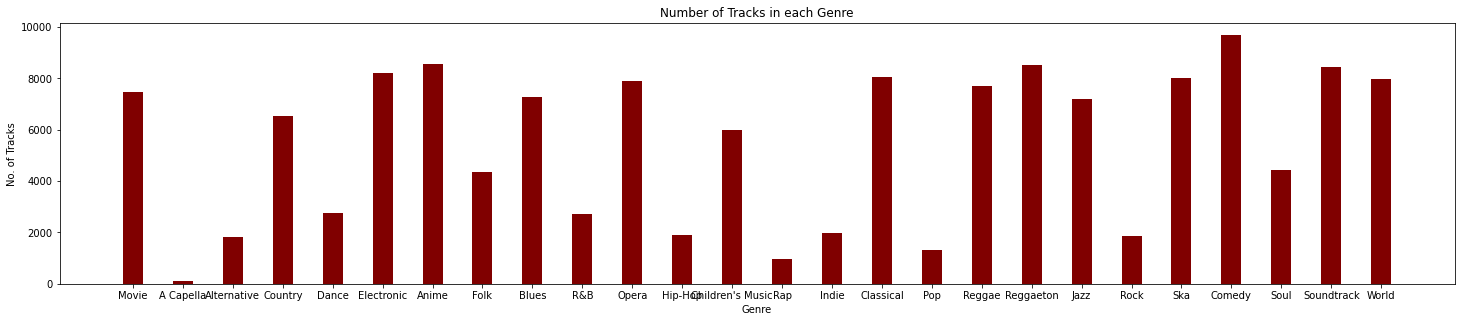

In [ ]:
genre_count = pd.DataFrame()
genre_count['genre'] = data.genre.unique()
count = []
for i, r in genre_count.iterrows():
    count.append((data.genre == r['genre']).sum())
genre_count['Number of Tracks With Genre'] = count

plt.figure(figsize=(25, 4.8))
 
# creating the bar plot
plt.bar(genre_count.genre, genre_count["Number of Tracks With Genre"], color ='maroon',
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("No. of Tracks")
plt.title("Number of Tracks in each Genre")
plt.show()

Now, we have a general idea about the number of genre's and the frequency of the genre's in our data set. We know want to examine some of the other features over genre. As mentioned before our data contains a variety of audio based features as well as popularity. Popularity is something we're very interested in because we want to get an understanding of what audio features, if any, influence popularity. Another one that we want to look at is valence. Valence, as mentioned earlier, is about the mood of the music. The higher the valence the more positive the sound (happy, cheerful) and the lower the valence the more negative (sad, angry). This would be an interesting feature to see what other audio features influence it. 

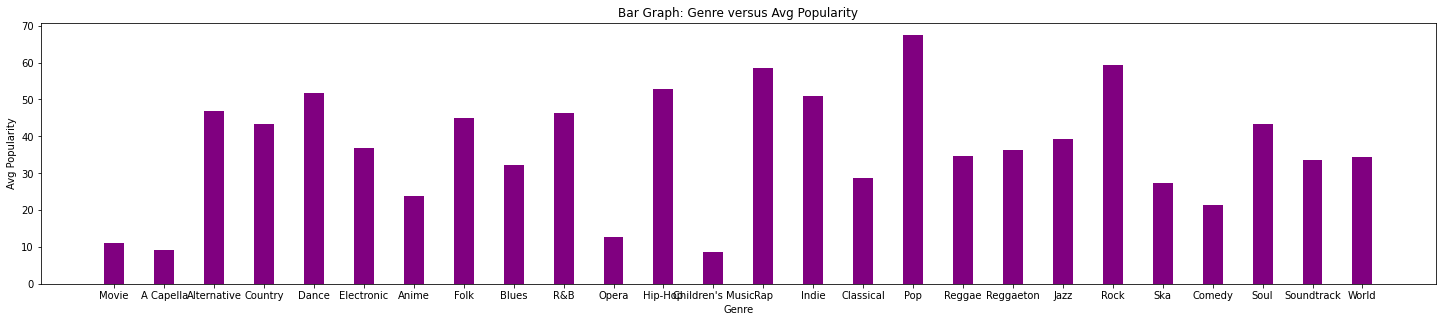

In [ ]:
popular_by_genre = pd.DataFrame()
popular_by_genre['genre'] = data.genre.unique()
avgpop = []

for g in data.genre.unique():
    p = (data.groupby('genre').get_group(g)['popularity']).mean()
    avgpop.append(p)

popular_by_genre['Avg Pop Per Genre'] = avgpop
plt.figure(figsize=(25, 4.8))
 
# creating the bar plot
plt.bar(popular_by_genre.genre, popular_by_genre['Avg Pop Per Genre'], color ='purple',
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("Avg Popularity")
plt.title("Bar Graph: Genre versus Avg Popularity")
plt.show()

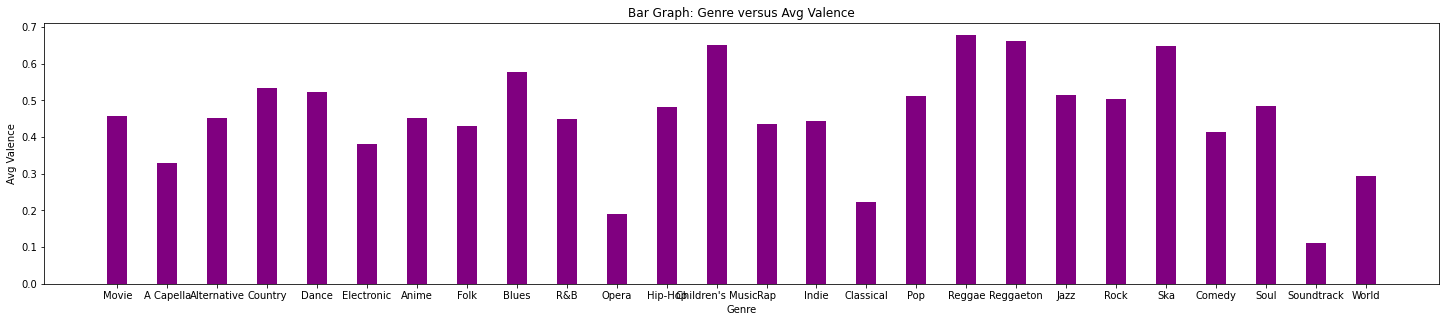

In [ ]:
popular_by_genre = pd.DataFrame()
popular_by_genre['genre'] = data.genre.unique()
avgval = []

for g in data.genre.unique():
    v = (data.groupby('genre').get_group(g)['valence']).mean()
    avgval.append(v)

popular_by_genre['Avg Val Per Genre'] = avgval
plt.figure(figsize=(25, 4.8))
 
# creating the bar plot
plt.bar(popular_by_genre.genre, popular_by_genre['Avg Val Per Genre'], color ='purple',
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("Avg Valence")
plt.title("Bar Graph: Genre versus Avg Valence")
plt.show()

**Popularity:**

Based on the plot "Bar Graph: Genre versus Avg Popularity", we can see which genres have, in general, a higher average popularity. Pop, Rap, Rock, Hip-Hip, and Dance have the highest average popularity among the genres listed. This makes sense because they are the more common genres we see in music. 

**Valence:**

Based on the plot "Bar Graph: Genre versus Avg Valence", we can see which genres have, in general, a higher average valence. Children's Music, Reggae, Reggaton, Ska, and Blues have the highest average valence among the genres. Blues is kind of suprising, but the other genres are to be expected. Also makes sense that Opera, Soundtrack, and classical have a lower valence. 



---



While these graphs give us some insight, to get a better understanding we want to use a plot that could give us a more thorough look at the distribution. For that reason, we are going to create boxplots. 


The boxplots will provide descriptive and robust statistics of popularity and valence across the genres of music shown in our dataset. These statistics include median, interquartile range, and outliers of each genre's popularity and valence. From these, we gain a general sense of how each genre's popularity and valence compares to each other. The yellow/orange bar in each box will mark the median of the numeric value we are plotting for each genre. This provides us with robust measurement of location for the feature's average against these genres. With this we will then identify which genres have the highest and lowest average in terms of each feature, popularity or valence. Robust means that the statistic performs well against errors or exceptions within the data. The Interquartile range (IQR) shows the spread of the middle half of our data (within the 25% and 75% mark of a genre's popularity or valence). This measure shows the variability of the data and can be found looking at the top and bottom edges of the boxes. The circles above and below the boxes show the outlier data in terms of popularity for each genre. An outlier is defined by whether or not they lie within the minimum and maximum whiskers of the boxplot.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


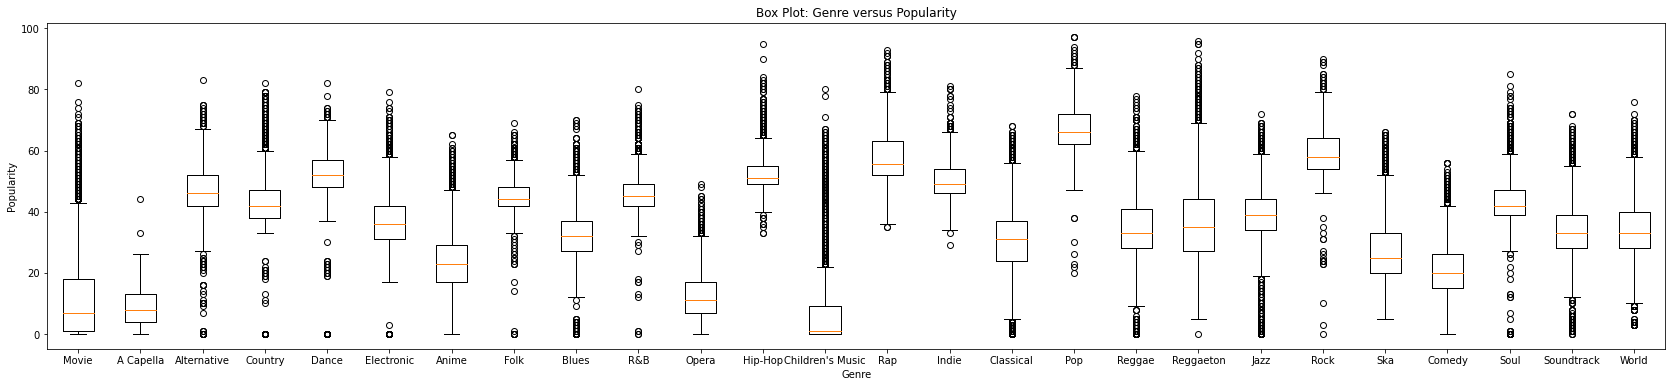

In [ ]:
popularity_by_genre = {}
for index, row in data.iterrows():
    if row['genre'] in popularity_by_genre.keys():
        popularity_by_genre[row['genre']].append(row['popularity'])
    else:
        popularity_by_genre[row['genre']] = [row['popularity']]
fig, ax = plt.subplots(figsize=(29, 6))
ax.boxplot(popularity_by_genre.values())
ax.set_xticklabels(popularity_by_genre.keys())

ax.set_xlabel("Genre")
ax.set_ylabel("Popularity")
ax.set_title("Box Plot: Genre versus Popularity")
plt.show()



Looking at this, we can see that Pop music has the highest median popularity, closely followed by Rock, Rap, and Dance music. On the bottom end, we see that children's music has lowest median popularity followed by Movie and A Capella music. Among the genres in the plot, we can see that Hip-Hop, Folk, and R&B have the tightest distributions, meaning that most of the data is centered closely around the median for these genres. Alternatively, Movie, Reggaeton, and Classical music appear to have the largest IQRs, showing that more of its data has more distance from the median. In the plot of the genre's we observe that generally outliers have a higher popularity than the majority of data for each genre.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


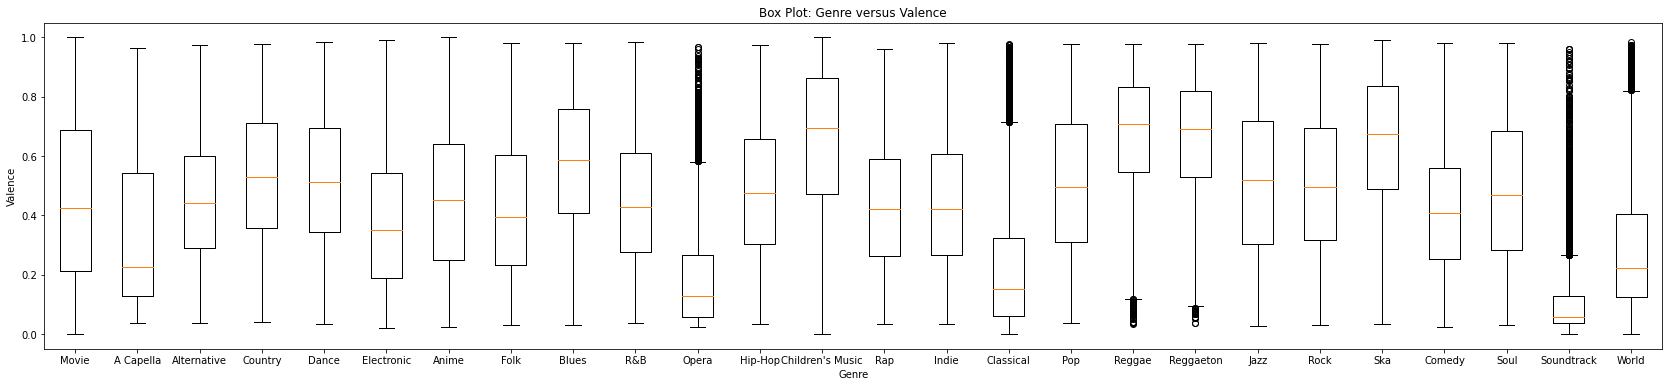

In [ ]:
genre_val = {}
for index, row in data.iterrows():
    if row['genre'] in genre_val.keys():
        genre_val[row['genre']].append(row['valence'])
    else:
        genre_val[row['genre']] = [row['valence']]
        
fig, ax = plt.subplots(figsize=(29, 6))
ax.boxplot(genre_val.values())
ax.set_xticklabels(genre_val.keys())

ax.set_xlabel("Genre")
ax.set_ylabel("Valence")
ax.set_title("Box Plot: Genre versus Valence")
plt.show()

Looking at the boxplot of valence by genre, we can derive all of the same statistical information as we did with the boxplot of popularity by genre. First, we find that Reggae music has the highest median valence, closely followed by Reggaeton, Ska, and Children’s music. On the bottom end, we see that Soundtrack music has lowest median valence followed by Opera and Classical music. Among the genres in the plot, we can see that Soundtrack, Opera, and Classical music have the tightest distributions looking at their IQRs. Alternatively, Movie, Jazz, and Soul music appear to have the largest IQRs. In the plot of the genre's we observe that generally outliers have a higher valence than the majority of data for each genre.






---



Now we are going to look at the relationships between valence and the other audio features and popularity and the other audio features. We will be slicing and breaking up the data by genre. We decided to slice by genre because looking at all the data without some organization is overwhelming and very unclear. For example, if we just did a scatterplot of Acousticness versus Popularity without any slicing and organization it would look like this: 

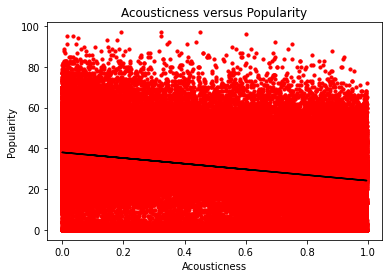

In [ ]:
plt.scatter(data["acousticness"], data["popularity"], s =10, c = "red")

plt.xlabel("Acousticness", size=10)
plt.ylabel("Popularity", size=10)
plt.title("Acousticness versus Popularity")

m, b = np.polyfit(data["acousticness"], data["popularity"], 1)
plt.plot(data["acousticness"], m*(data["acousticness"])+b, color = "black")

plt.show()

The graph has too much data on it and is impossible to read therefore incredibly unhelpful. That is the reason for why we will be slicing by genre.

Before we start making any plots, our first step is to slice the data by genre and then calculate the averages of the audio features (acousticness, danceability, loudness, energy, instrumentalness, speechiness, tempo, valence) for each genre and do the same for popularity.

In [ ]:
#acousticness, danceability, loudness, energy, instrumentalness, speechiness, tempo, valence

#start by grouping together the genres
data_genre = data.groupby('genre')
avg_acous_col = []
avg_dance_col = []
avg_loud_col = []
avg_egy_col = []
avg_instr_col = []
avg_speech_col = []
avg_tmp_col = []
avg_vl_col = []
avg_pop_col = []

#for each of the features calculate the average of it within the specific genre
for g in data.genre.unique():
    avg_acous = (data_genre.get_group(g)['acousticness']).mean()
    avg_acous_col.append(avg_acous)
    
    avg_dn = (data_genre.get_group(g)['danceability']).mean()
    avg_dance_col.append(avg_dn)
    
    avg_ld = (data_genre.get_group(g)['loudness']).mean()
    avg_loud_col.append(avg_ld)
    
    avg_e = (data_genre.get_group(g)['energy']).mean()
    avg_egy_col.append(avg_e)
    
    avg_in = (data_genre.get_group(g)['instrumentalness']).mean()
    avg_instr_col.append(avg_in)
    
    avg_sp = (data_genre.get_group(g)['speechiness']).mean()
    avg_speech_col.append(avg_sp)
    
    avg_t = (data_genre.get_group(g)['tempo']).mean()
    avg_tmp_col.append(avg_t)
    
    avg_v = (data_genre.get_group(g)['valence']).mean()
    avg_vl_col.append(avg_v)
    
    avg_p = (data_genre.get_group(g)['popularity']).mean()
    avg_pop_col.append(avg_p)
    
#create a new dataframe to hold these averages 
genre_count['Avg Acoust'] = avg_acous_col
genre_count['Avg Dance'] = avg_dance_col
genre_count['Avg Loud'] = avg_loud_col
genre_count['Avg Energy'] = avg_egy_col
genre_count['Avg Instru'] = avg_instr_col
genre_count['Avg Speech'] = avg_speech_col
genre_count['Avg Tempo'] = avg_tmp_col
genre_count['Avg Val'] = avg_vl_col
genre_count['Avg Pop'] = avg_pop_col
genre_count

genre  Number of Tracks With Genre  ...   Avg Val    Avg Pop
0              Movie                         7480  ...  0.456952  11.162433
1          A Capella                          119  ...  0.328724   9.302521
2        Alternative                         1817  ...  0.452183  46.841497
3            Country                         6526  ...  0.532664  43.231229
4              Dance                         2738  ...  0.521202  51.743243
5         Electronic                         8186  ...  0.381457  36.863670
6              Anime                         8556  ...  0.451979  23.888967
7               Folk                         4342  ...  0.430757  45.004606
8              Blues                         7255  ...  0.578137  32.093177
9                R&B                         2725  ...  0.447904  46.275229
10             Opera                         7891  ...  0.190235  12.705867
11           Hip-Hop                         1903  ...  0.482935  52.937467
12  Children's Music                         6006  ...  0.649602   8.651515
13               Rap                          982  ...  0.434643  58.511202
14             Indie                         1974  ...  0.444015  50.901722
15         Classical                         8042  ...  0.222763  28.651455
16               Pop                         1329  ...  0.510723  67.404063
17            Reggae                         7689  ...  0.676880  34.658863
18         Reggaeton                         8526  ...  0.660007  36.395496
19              Jazz                         7185  ...  0.513024  39.165344
20              Rock                         1865  ...  0.504130  59.229491
21               Ska                         8016  ...  0.647304  27.439371
22            Comedy                         9673  ...  0.412638  21.317068
23              Soul                         4418  ...  0.484146  43.451335
24        Soundtrack                         8446  ...  0.112301  33.692872
25             World                         7961  ...  0.294787  34.394548

[26 rows x 11 columns]

#### **Valence Graphs**

First we're going to create our valence scatter plots. We are going to have each scatter plot be the relationship of the audio features versus valence. We are going to use the averages we stored in the dataframe above. Each point is going to be representative of one of the 25 genres. We will also include a regression line on each plot to help with interpretability. 

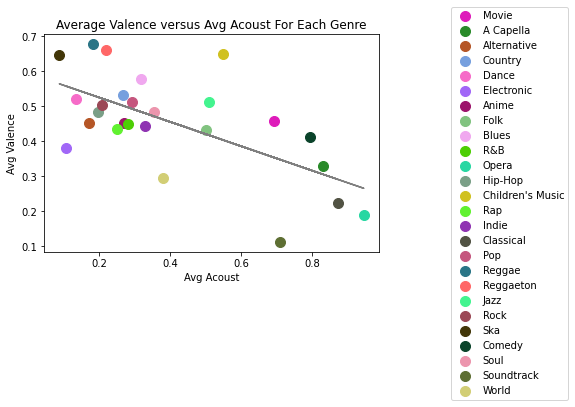

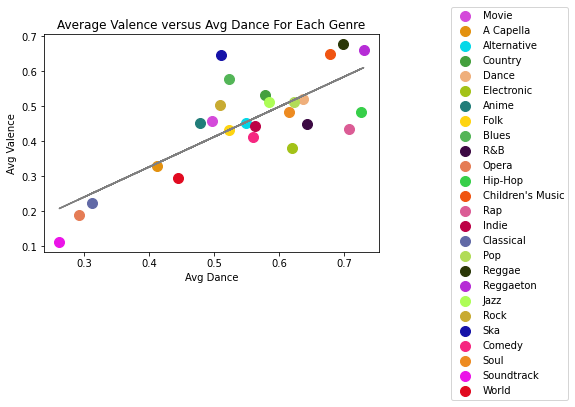

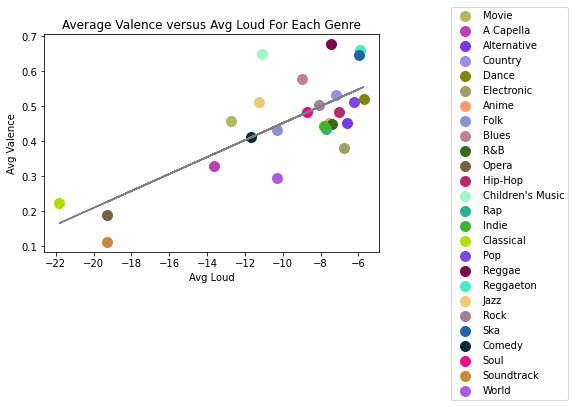

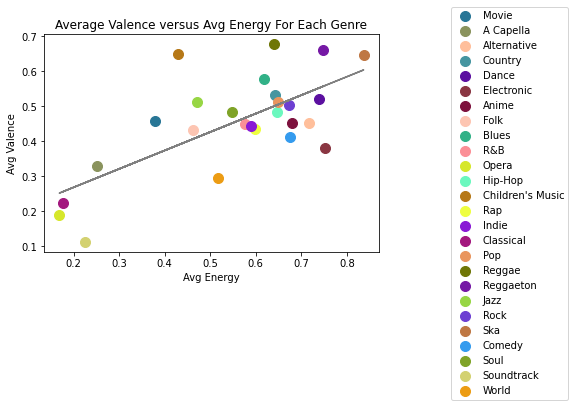

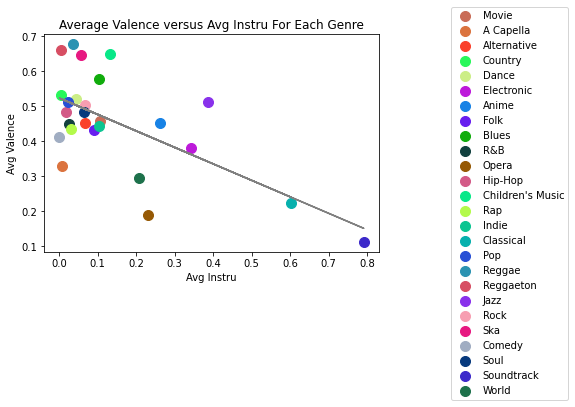

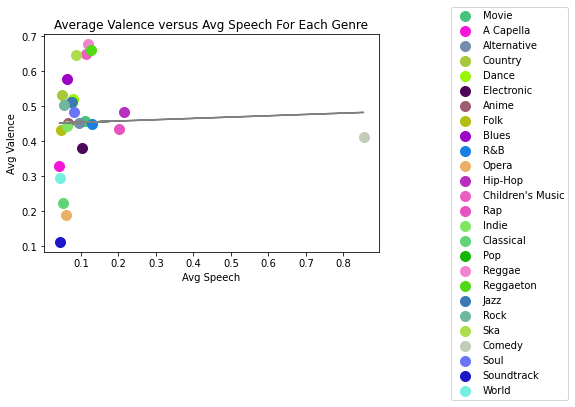

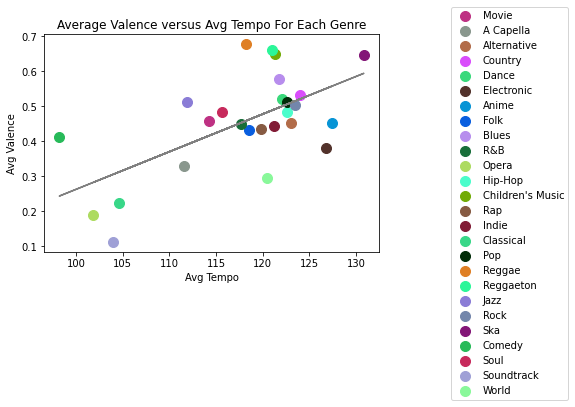

In [ ]:
audio_features = ['Avg Acoust', 'Avg Dance','Avg Loud','Avg Energy','Avg Instru','Avg Speech','Avg Tempo']
for a in audio_features: 
    sequence = np.arange(len(data.genre.unique()))
    for co in sequence:
        rgb = np.random.rand(3,)
        plt.scatter(genre_count[a][co], genre_count['Avg Val'][co], s =100, c = [rgb], label = list(genre_count["genre"])[co])


    plt.ylabel("Avg Valence", size=10)
    plt.xlabel(a, size=10)
    plt.title("Average Valence versus " + a + " For Each Genre")
    plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1.15))

    m, b = np.polyfit(genre_count[a], genre_count['Avg Val'], 1)
    plt.plot(genre_count[a], m*(genre_count[a])+b, color = "gray")

    plt.show()

So what do the graphs tell us about the relationship between valence and the different audio features?

**Acousticness:**

The graph of the average acousticness against average valence for each genre has a downward trend as depicted by the negative slope of the line of best fit, showing that valence generally tends to increase as acousticness decreases. There appears to be a decent correlation between acousticness and valence as we can clearly see the data falling lower and lower on the valence axis as acousticness persists. The graph appears to have most of the data lie below 0.5 acousticnesss and above 0.5 valence. From this, we can gather that music in general does not tend toward having high acousticness.  In this region where most of the data lies, the trend seems to be upheld. From this we believe there to be a moderate correlation between acousticness and valence

**Danceability:**
 
The graph of the average danceability against average valence for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that  generally valence tends to increase as danceability increases. The data seems to be mostly evenly distributed across danceability; It seems that there are points across the plot that are close to the line of best fit and we can clearly see the points lie farther and farther up the valence axis as danceability increases. This leads us to believe that there is a very strong relationship between danceability and valence as opposed to other features. 

**Loudness:**

The graph of the average loudness against average valence for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that valence generally tends to increase as loudness increases.The majority of the data lies above -14 loudness. This shows us that music tends to be made at this volume or higher and that those considerably below this volume are exceptions. Even with this cluster of data in the upper range of loudness, the positive trend of valence as loudness increases is visually prominent. Because of this, it seems that there is a strong correlation between loudness and valence. 

**Energy:**

The graph of the average energy against average valence for each genre has an upward trend as indicated by the positive slope of the line of best fit, showing that popularity generally tends to increase as energy increases. The data seems to be distributed a bit more evenly than loudness in terms of the energy axis, however, there does still seem to be more data above 0.5 energy. Similarly to loudness, the trend of increasing valence is visually prominent as one can see the points moving higher along the valence axis as energy increases. Because of this and the similar distribution of data across the plot, we expect valence to have a relationship with energy similar to its relationship with loudness. 

**Instrumentalness:**
 
The graph of the average instrumentalness against average valence for each genre has a downward trend as depicted by the negative slope of the line of best fit, showing that valence generally tends to increase as instrumentalness decreases. Most of the data lies below 0.15 instrumentalness and for the points within this range the mostly lie above 0.4 on the valence axis. For the remaining points above 0.15 instrumentalness, they mostly fall below 0.4 valence.  Based on this, we can say that there is a visual indication of the negative trend of valence across instrumentalness. However, it is difficult to tell how strongly correlated these variables are due to the large cluster of points in the plot.

**Speechiness:**
 
The graph of the average speechiness against average valence for each genre has a slight upward trend as depicted by the positive slope of best fit, showing that valence generally tends to increase as speechiness increases. Similarly to instrumentalness, most of the dat falls below 0.2 speechiness. Additionally, for the points within this range of speechiness, the range of valence goes from 0.1  to 0.7. Due to this distribution of the data, it is difficult to determine how strong the relationship between valence and speechiness is as it was with instrumentalness.

**Tempo:**

The graph of the average tempo against average valence for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that valence generally tends to increase as tempo increases. The data is more evenly distributed as opposed to the instrumentalness and speechiness. Looking at the graph, we found that for some of the data the positive trend of valence is noticeable. However, it is just as noticeable visually that there are some points that do not follow the trend well. Based on this, we expect that tempo will have a significant correlation with valence but not as much as those that are much more clearly related to valence like loudness and energy.


#### **Popularity Graphs**

Now, we're going to create our popularity scatter plots. We are going to have each scatter plot be the relationship of the audio features versus popularity. We are going to use the averages we stored in the dataframe above. Each point is going to be representative of one of the 25 genres. We will also include a regression line on each plot to help with interpretability. 

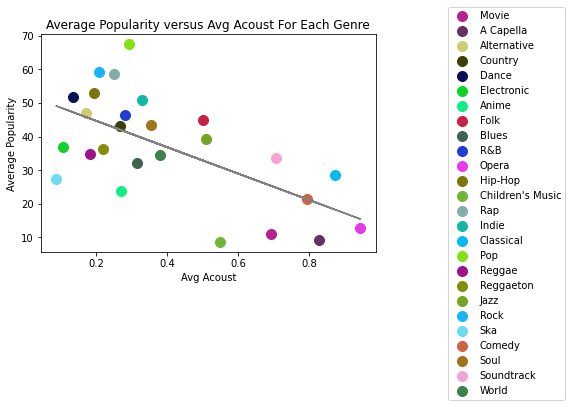

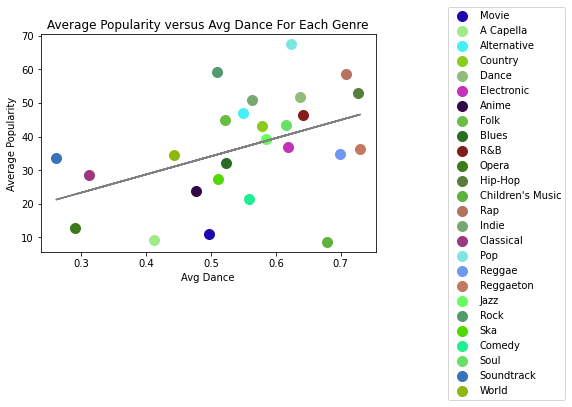

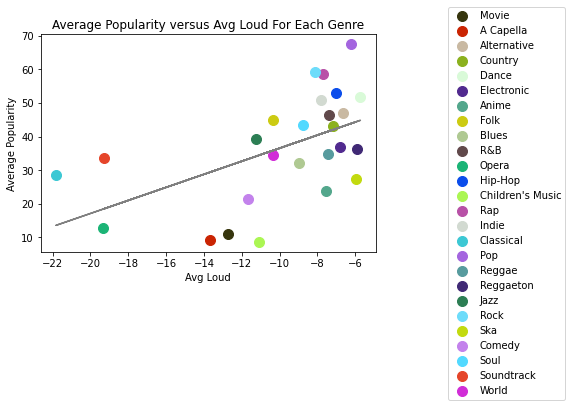

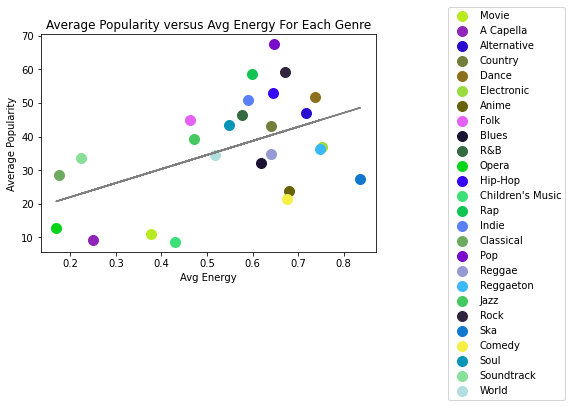

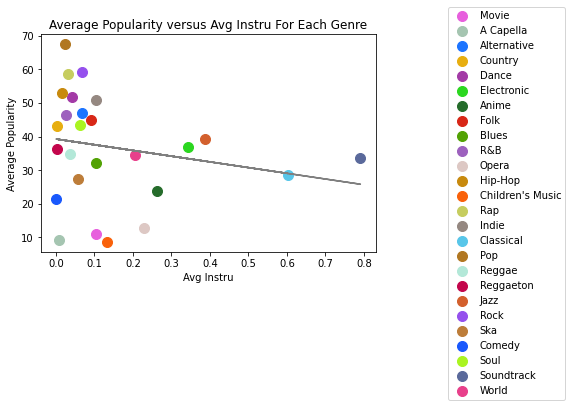

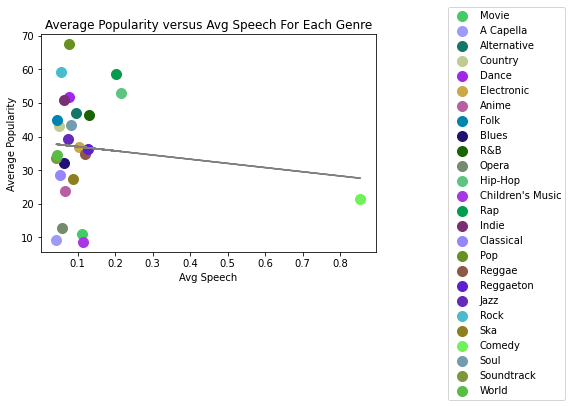

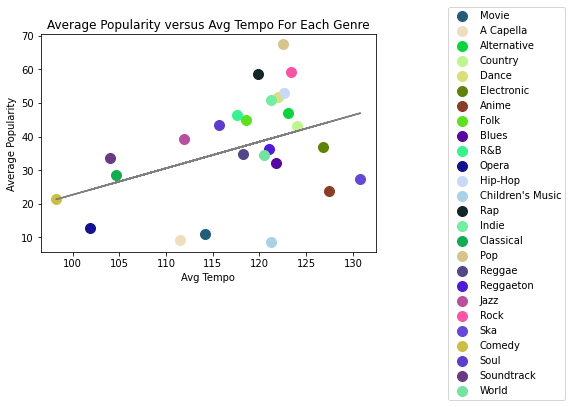

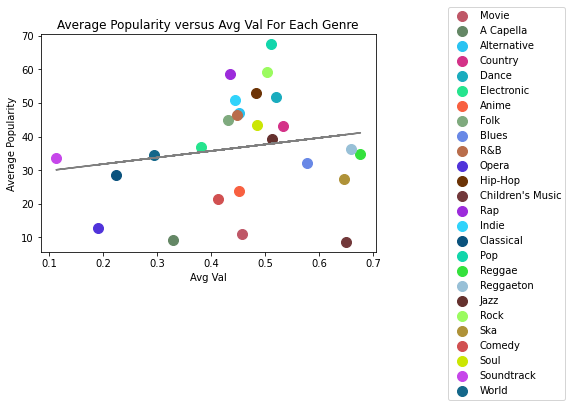

In [ ]:
audio_features = ['Avg Acoust', 'Avg Dance','Avg Loud','Avg Energy','Avg Instru','Avg Speech','Avg Tempo','Avg Val']
for a in audio_features: 
    sequence = np.arange(len(data.genre.unique()))
    for co in sequence:
        rgb = np.random.rand(3,)
        plt.scatter(genre_count[a][co], genre_count['Avg Pop'][co], s =100, c = [rgb], label = list(genre_count["genre"])[co])


    plt.ylabel("Average Popularity", size=10)
    plt.xlabel(a, size=10)
    plt.title("Average Popularity versus " + a + " For Each Genre")
    plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1.15))

    m, b = np.polyfit(genre_count[a], genre_count['Avg Pop'], 1)
    plt.plot(genre_count[a], m*(genre_count[a])+b, color = "gray")

    plt.show()

So what do the graphs tell us about the relationship between popularity and the different audio features?

**Acousticness:**

The graph of the average acousticness against average popularity for each genre has a downward trend as depicted by the negative slope of the line of best fit, showing that popularity generally tends to increase as acousticness decreases. There does not appear to be a strong correlation between acousticness and popularity however we can see that most genres have low acousticness. The graph appears to have two clusters of genres - one toward the low end of acousticness and one toward the high end of acousticness. Not many genres fall in the mid range of acousticness. It is possible that this is because it is difficult to create appealing music that blends acoustic and non-acoustic elements. 

**Danceability:**
 
The graph of the average danceability against average popularity for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that popularity generally tends to increase as danceability increases. The data seems to have a greater distribution in this category than acousticness; there are not very prominent clusters of genres across the plot. It seems that there are points across the plot that are close to the line of best fit. However, the steepness of the regression line seems to be slightly less than that of acousticness.

**Loudness:**
 
The graph of the average loudness against average popularity for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that popularity generally tends to increase as loudness increases. Most of the data tends to lie on the higher end of loudness. Additionally, it seems that most of the points with higher loudness also lie close to the line of best fit. 

**Energy:**

The graph of the average energy against average popularity for each genre has an upward trend as indicated by the positive slope of the line of best fit, showing that popularity generally tends to increase as energy increases. Most of the data lies above the 0.5 energy mark. This shows us most genres in general tend to have a higher energy level. However, for genres with higher energy, the average popularity ranges between about 20 to 70. Based on how spread out the data, there does not seem to be a strong correlation between energy and popularity. 

**Instrumentalness:**
 
The graph of the average instrumentalness against average popularity for each genre has a downward trend as depicted by the negative slope of the line of best fit, showing that popularity generally tends to increase as instrumentalness decreases. The vast majority of the data lies between 0.0 and 0.15 instrumentalness. Based on this, we can gather that many genres tend to have low instrumentalness. Additionally, among the genres that lie within this range of instrumentalness, the average popularity ranges between about 10 and 70. Based on this, we do not expect a correlation between instrumentalness and popularity. 

**Speechiness:**
 
The graph of the average speechiness against average popularity for each genre has a downward trend as depicted by the negative slope of best fit, showing that popularity generally tends to increase as speechiness decreases. Similarly to instrumentalness, the vast majority of the data lies between 0.0 and 0.2 speechiness. Among the genres that lie within this range of speechiness, the average popularity ranges between about 70% and 10%. Based on this, we can conclude that music in general tends to have low speechiness, and we do not expect a correlation between speechiness and popularity. 

**Tempo:**
 
The graph of the average tempo against average popularity for each genre has an upward trend as depicted by the positive slope of the line of best fit, showing that popularity generally tends to increase as tempo increases. There is a more even distribution of the data as opposed to the other plots as there are not as intense clusters of points across the plot. Most of the data does seem to lie above the 115 bpm mark of tempo. Based on this, we expect that tempo will have a higher correlation to popularity than some of the features but not those with a relatively strong correlation.

**Valence:**
 
The graph of the average valence against average popularity for each genre has an upward trend as depicted by the slight positive slope of the line of best fit, showing that popularity generally tends to increase as valence increases. The plot of valence also appears to have a more even distribution of the data as opposed to other features with only a small cluster of points among the genres with the most average popularity. With the spread of points that lie outside of this range of popularity, it is difficult to tell whether or not there is a correlation between popularity and valence.

#### **Now, we're going to standardize**

We standardize when comparing the effects of variables with unequal units, e.g. does age or education have a larger effect on income? The standardization of a variable essentially centers and scales the data. It transforms the data into a unitless scale. This will help make it more easy to interpret and help us get a better comprehension of the data. For more insight into standardization, look here: https://www.ohdsi.org/data-standardization/. We will be using the formula below. 
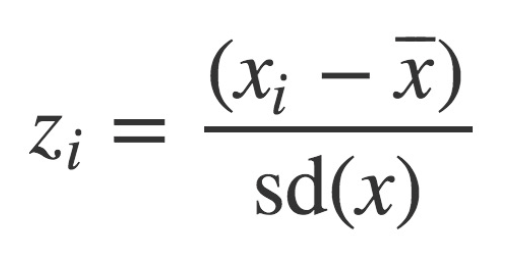

We are going to follow a very similar process to the one above. We are going to calculate the standardized values for each audio feature. Add them to the large dataset. We are then going to go through and calculate the average of each standardized varible so we can replot. 

In [ ]:
#create a new dataframe to now also include the standardized values
data_stand = data.copy()
#function created to standarize the audio features
def standardize (df, audiofeature):
    stndrd = (df[audiofeature] - (df[audiofeature].mean())) / (df[audiofeature].std())
    return stndrd
#go through all the features and standardize them
afeatures = ['acousticness', 'danceability', 'loudness', 'energy', 'instrumentalness', 'speechiness', 'tempo', 'valence']
for af in afeatures:
    stnd = standardize(data_stand, af)
    title = 'stand_' + af[:4]
    data_stand[title] = stnd
    
#display the new dataframe
data_stand

genre               artist_name  ... stand_temp stand_vale
0       Movie            Henri Salvador  ...   1.587101   1.327853
1       Movie         Martin & les fées  ...   1.809153   1.335132
2       Movie           Joseph Williams  ...  -0.543165  -0.295422
3       Movie            Henri Salvador  ...   1.738282  -0.808610
4       Movie              Fabien Nataf  ...   0.753917  -0.215350
...       ...                       ...  ...        ...        ...
141645   Soul               John Legend  ...  -0.527287   1.167709
141646   Soul                     Belly  ...   1.861652   0.119496
141647   Soul        Bobby "Blue" Bland  ...  -1.157644   0.174090
141648   Soul  Jr Thomas & The Volcanos  ...  -0.090412   1.891996
141649   Soul            Mint Condition  ...  -0.088296   0.108577

[141650 rows x 26 columns]

In [ ]:

#standarized acousticness, danceability, loudness, energy, instrumentalness, speechiness, tempo, valence

#calculate the avergage of each standardized variable for each genre (same way we did earlier)
data_genre = data_stand.groupby('genre')
avg_ac_std = []
avg_dnc_std = []
avg_loud_std = []
avg_egy_std = []
avg_instr_std = []
avg_speech_std = []
avg_tmp_std = []
avg_vl_std = []

for g in data_stand.genre.unique():
    avg_std = (data_genre.get_group(g)['stand_acou']).mean()
    avg_ac_std.append(avg_std)
    
    avg_dn = (data_genre.get_group(g)['stand_danc']).mean()
    avg_dnc_std.append(avg_dn)
    
    avg_ld = (data_genre.get_group(g)['stand_loud']).mean()
    avg_loud_std.append(avg_ld)
    
    avg_e = (data_genre.get_group(g)['stand_ener']).mean()
    avg_egy_std.append(avg_e)
    
    avg_in = (data_genre.get_group(g)['stand_inst']).mean()
    avg_instr_std.append(avg_in)
    
    avg_sp = (data_genre.get_group(g)['stand_spee']).mean()
    avg_speech_std.append(avg_sp)
    
    avg_t = (data_genre.get_group(g)['stand_temp']).mean()
    avg_tmp_std.append(avg_t)
    
    avg_v = (data_genre.get_group(g)['stand_vale']).mean()
    avg_vl_std.append(avg_v)
    
    
    
genre_count['Avg Stand Acoust'] = avg_ac_std
genre_count['Avg Stand Dance'] =avg_dnc_std
genre_count['Avg Stand Loud'] = avg_loud_std
genre_count['Avg Stand Energy'] =avg_egy_std
genre_count['Avg Stand Instru'] = avg_instr_std
genre_count['Avg Stand Speech'] = avg_speech_std
genre_count['Avg Stand Tempo'] = avg_tmp_std
genre_count['Avg Stand Val'] = avg_vl_std
genre_count

genre  ...  Avg Stand Val
0              Movie  ...       0.028332
1          A Capella  ...      -0.438371
2        Alternative  ...       0.010974
3            Country  ...       0.303893
4              Dance  ...       0.262177
5         Electronic  ...      -0.246445
6              Anime  ...       0.010229
7               Folk  ...      -0.067010
8              Blues  ...       0.469398
9                R&B  ...      -0.004601
10             Opera  ...      -0.942422
11           Hip-Hop  ...       0.122898
12  Children's Music  ...       0.729505
13               Rap  ...      -0.052866
14             Indie  ...      -0.018754
15         Classical  ...      -0.824031
16               Pop  ...       0.224038
17            Reggae  ...       0.828787
18         Reggaeton  ...       0.767375
19              Jazz  ...       0.232411
20              Rock  ...       0.200040
21               Ska  ...       0.721143
22            Comedy  ...      -0.132958
23              Soul  ...       0.127308
24        Soundtrack  ...      -1.226071
25             World  ...      -0.561890

[26 rows x 19 columns]

#### **Standardized Valence Graphs**
Now, we're going to recreate our valence scatter plots with the standardization. We are going to have each scatter plot be the relationship of the average standardized audio features versus average valence. We are going to use the averages of the standardized variables we stored in the dataframe above. Each point is going to be representative of one of the 25 genres. We will also include a regression line on each plot to help with interpretability.

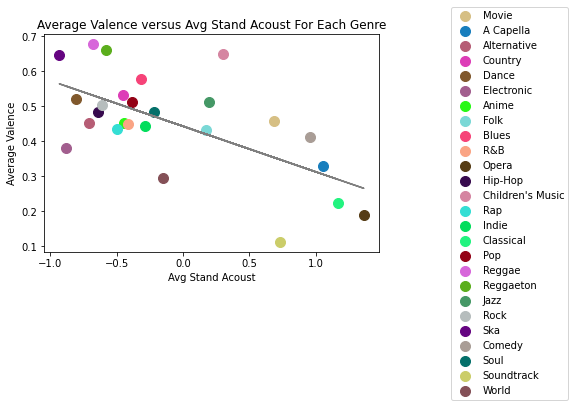

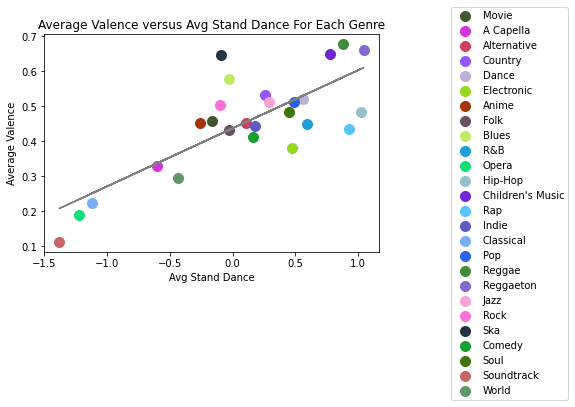

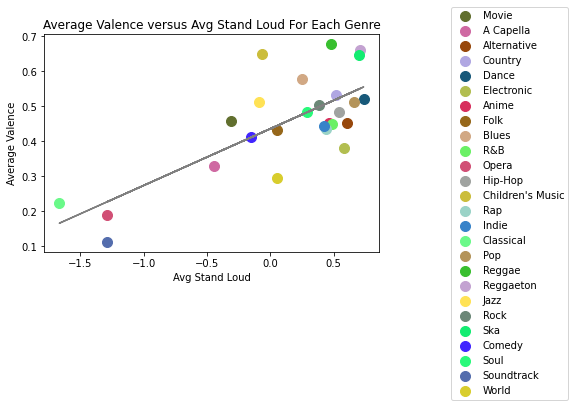

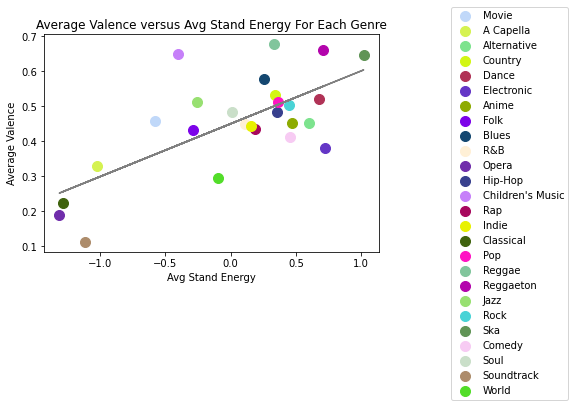

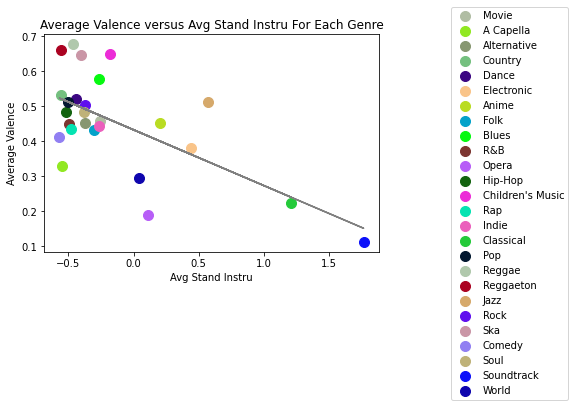

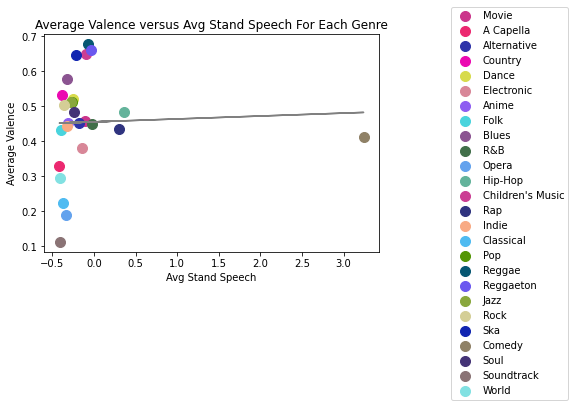

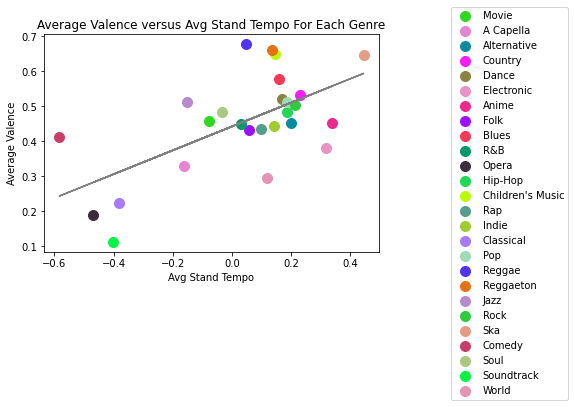

In [ ]:
audio_features = ['Avg Stand Acoust', 'Avg Stand Dance','Avg Stand Loud','Avg Stand Energy','Avg Stand Instru','Avg Stand Speech','Avg Stand Tempo']
for a in audio_features:
    sequence = np.arange(len(data.genre.unique()))
    for co in sequence:
        rgb = np.random.rand(3,)
        plt.scatter(genre_count[a][co], genre_count['Avg Val'][co], s =100, c = [rgb], label = list(genre_count["genre"])[co])


    plt.ylabel("Average Valence", size=10)
    plt.xlabel(a, size=10)
    plt.title("Average Valence versus " + a + " For Each Genre")
    plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1.15))

    m, b = np.polyfit(genre_count[a], genre_count['Avg Val'], 1)
    plt.plot(genre_count[a], m*(genre_count[a])+b, color = "gray")

    plt.show()

#### **Standarized Popularity Graphs**
Now, we're going to recreate our popularity scatter plots with the standardization. We are going to have each scatter plot be the relationship of the average standardized audio features versus average popularity. We are going to use the averages of the standardized variables we stored in the dataframe above. Each point is going to be representative of one of the 25 genres. We will also include a regression line on each plot to help with interpretability. 

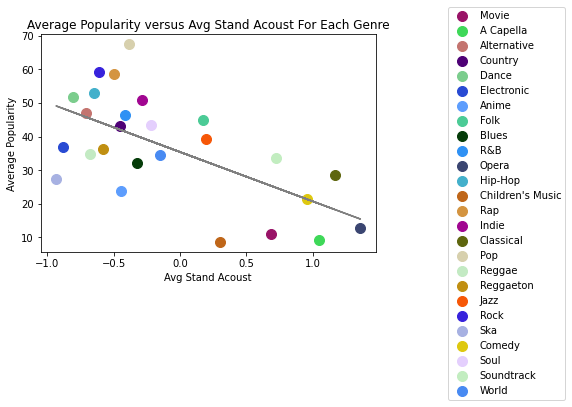

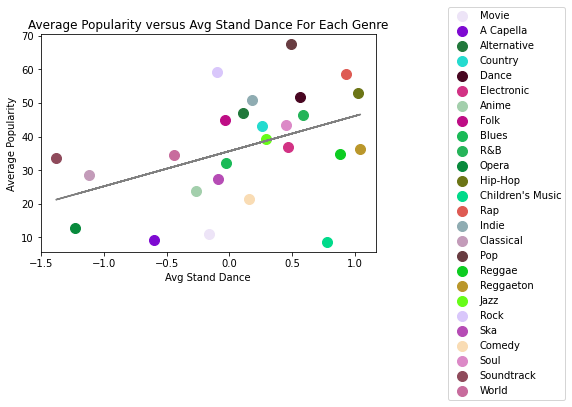

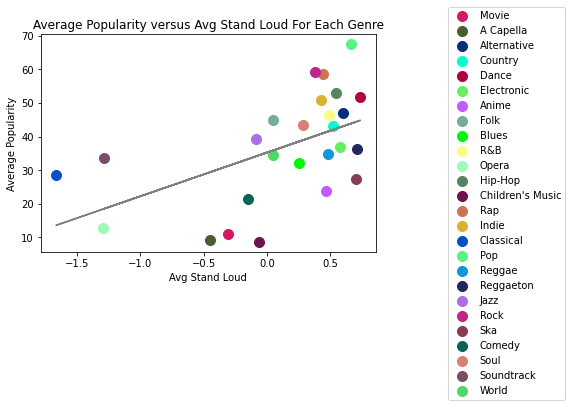

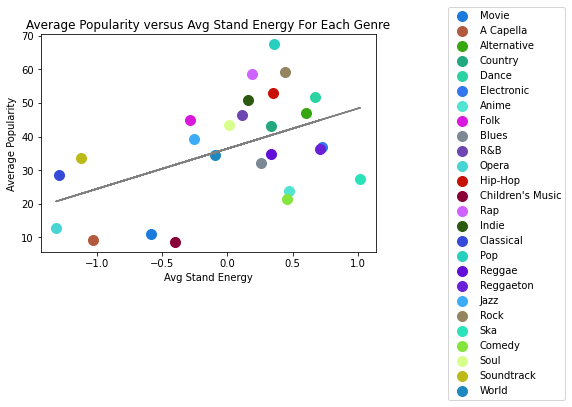

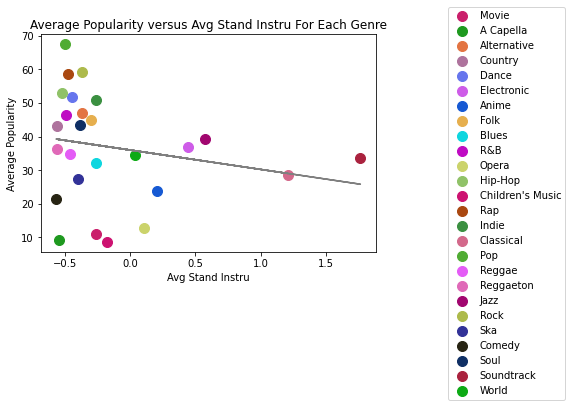

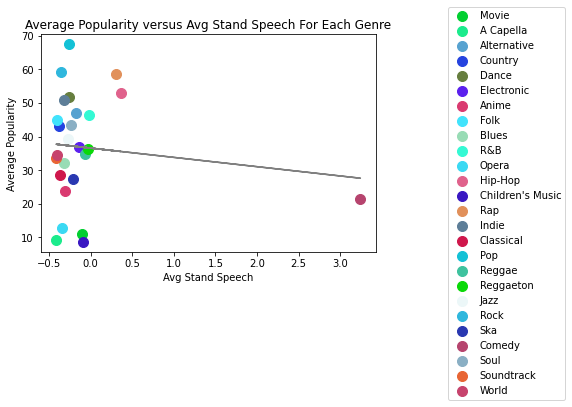

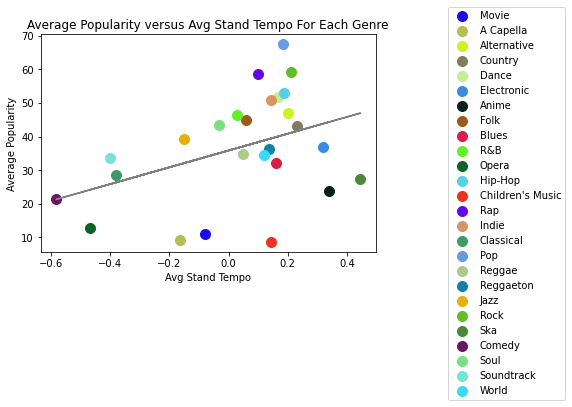

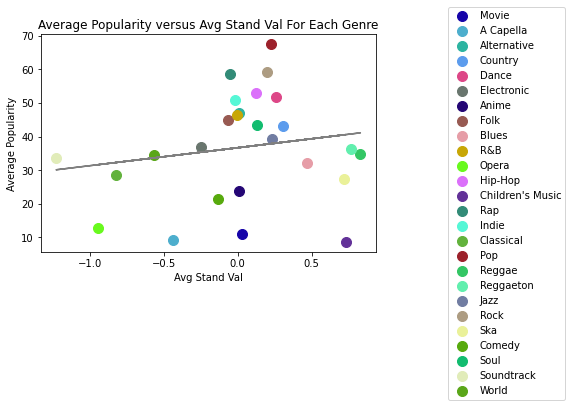

In [ ]:
audio_features = ['Avg Stand Acoust', 'Avg Stand Dance','Avg Stand Loud','Avg Stand Energy','Avg Stand Instru','Avg Stand Speech','Avg Stand Tempo','Avg Stand Val']
for a in audio_features:
    sequence = np.arange(len(data.genre.unique()))
    for co in sequence:
        rgb = np.random.rand(3,)
        plt.scatter(genre_count[a][co], genre_count['Avg Pop'][co], s =100, c = [rgb], label = list(genre_count["genre"])[co])


    plt.ylabel("Average Popularity", size=10)
    plt.xlabel(a, size=10)
    plt.title("Average Popularity versus " + a + " For Each Genre")
    plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1.15))

    m, b = np.polyfit(genre_count[a], genre_count['Avg Pop'], 1)
    plt.plot(genre_count[a], m*(genre_count[a])+b, color = "gray")

    plt.show()

Across all of the standardized plots, the trend of the data is exactly the same as the non-standardized version of the plots. Due to this, our visual interpretation of the standardized plots remains the same as the non-standardized plots. As standardization makes it such that all of the audio features are measured on the same scale, we can compare visually how much the data for each audio feature varies. Generally, most of the data in each standardized plot lie within the -0.5 to 0.5 range with the exception of acousticness. The three features with the tightest distribution of data appear to be tempo, valence, and speechiness (excluding the outlier of the Comedy genre). On the other hand, danceability and acousticness appear to have the greatest ranges of data among the audio features.





#### **Now, we're going to create a heatmap.** 

We want to ensure we have a good understanding of the relationships presented in our data. We are going to perform a correlation heatmap to get a better look at correlations and specifically look at the ones related to popularity and valence.

For more information on heatmaps: 
https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

Specifically correlation heatmaps: 
https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/, https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e, or https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/

Documentation: 
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
import seaborn as sbn

In [ ]:
#first create the correlation matrix the correlation heatmap will be based upon

#corr computes the pairwise correlation of columns and by default uses the Pearson method of correlation

#note: we are going to look at the original dataframe (the one without the standardization columns in it)
data.corr()

popularity  acousticness  ...     tempo   valence
popularity          1.000000     -0.327390  ...  0.078863  0.036097
acousticness       -0.327390      1.000000  ... -0.279329 -0.368998
danceability        0.165404     -0.381525  ...  0.064934  0.623282
duration_ms         0.042025      0.007794  ... -0.030635 -0.151709
energy              0.217593     -0.730745  ...  0.250577  0.460423
instrumentalness   -0.067832      0.287374  ... -0.109790 -0.348598
liveness           -0.144750      0.082477  ... -0.071577  0.001270
loudness            0.270917     -0.691342  ...  0.259412  0.450317
speechiness        -0.169741      0.191569  ... -0.119374  0.015196
tempo               0.078863     -0.279329  ...  1.000000  0.179346
valence             0.036097     -0.368998  ...  0.179346  1.000000

[11 rows x 11 columns]

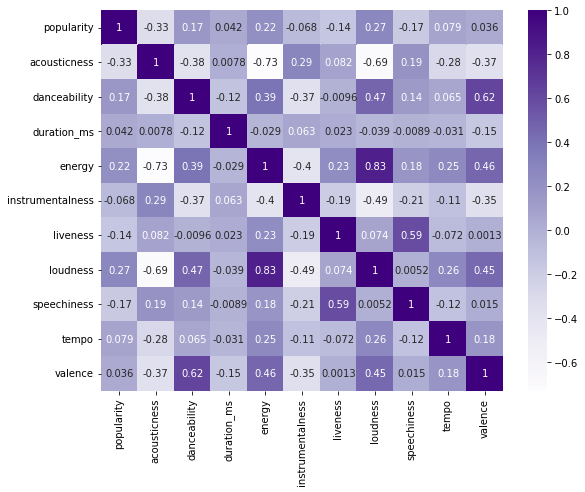

In [ ]:
#next create the more visually appealing heatmap
plt.figure(figsize=(9, 7))
corr_heat_map = sbn.heatmap(data.corr(), annot = True, cmap = 'Purples')
plt.show()

#### **Analysis of the heatmap**
In order to analyze the heatmap, you have to first understand what is represents. I recommend taking a look at the Medium, GeeksForGeeks, or Data Analytics article (all linked above) to get some more insight, but I will also quickly go through it here alongside my analysis. 

A correlation heatmap is a visual representation of a correlation matrix. It essentially, as suggested by the name, allows one to get a visual and easily interpretable  understanding of the correlation between two variables in our dataset. The color bar on the side of the heat map will allow us to determine which colors are associated with a strong positive or negative correlation or may have no correlation at all. I decided to use the monochromic purple scale to make it more interpretable because the default colors can be a bit confusing to interpret. Our main focus for our analysis is looking at the popularity and valence row/column and determining which audio features have the strongest correlation (positive or negative) to it. 

##### **Popularity**: 
So much like we could tell from our plots earlier, acousticness and popularity have a negative correlation to each other (and it is correlation that we see in the popularity column). Also, we can also see that instrumentalness, valence, duration, and tempo dont have such a strong correlation either (though important to note that tempo has the highest absolute value among these and is positive so might have some slight importance in our analysis). These findings (excluding duration which we did not plot) match what we saw and talked about above. We chose not to plot duration because we doubted that there would be any sort of relationship which this confirms. We see that danceability, energy, and loudness have a somewhat positive correlation which again reaffirms what we saw in our graphs. 

One surprising thing was that liveness was as high as it was (even though not a lot). We can see it has somewhat of a negative correlation to popularity. We excluded this from our initially grpahing cause we did nto thing it would have nay sort of impact, so seeing it have a stronger correlation to some of the other variables we analyzed is interesting. We are still not going to include this variable in our anaylsis and hypothesis because it is not strong enough. Another suprising thing we see is that speech is as strong as danceibility when we initially said it had not much of a correlation. 

Also, important to note a lot of the correlation values are not very high. 

##### **Valence**: 
We can immediately see that valence has the strongest relationship with danceability. It has a somewhat high positive correlation value. We also notice it has a somewhat strong positive correlation to energy and loudness. This makes sense cause dance music tends to be upbeat and fun as would louder and higher energy music. There is almost no relationship between popularity and valence, speechiness and valence, and liveness and valence. It is suprising that there is no relationship between valence and popularity because we thought that maybe certain moods of music would be more popular.  There is a somewhat negative relationship between acousticness and valence and instrumentalness and valence which again makes sense. 

Also, important to note a lot of the correlation values are not very high, but in general higher than those in popularity. 

##### **Other Important Things to Note**: 
There is a very strong positive relationship between energy and loudness which we will need to take into account if we looking at other relationships with these variables. There is also a somewhat positive relationship between danceability and energy and danceability and loudness. This will also need to be taken into account. Finally there is also a pretty strong negative relationship with acousticness and energy and loudness. 



---



#### Now that we have a good understanding of the relationships that are present in the data, we are going to do a more thorough statistical analysis. 

We are specifically going look at the stronger popularity relationships present (specifically the ones we talked about above) adn the stronger valence relationships present. We will be looking at the R^2 value and the p value for these relationships and at timews will include interaction variables. Please reference the sources below if you would like additional reading on any of these. In order to do this we will be using statsmodels ols regession results. Important to note if the p value is less than 0.05 than statistically significant and we would prefer a somewhat high R^2 value (coefficient of determination). 

R^2: https://www.investopedia.com/terms/r/r-squared.asp

p value: https://measuringu.com/statistically-significant/

Interaction: 
https://stattrek.com/multiple-regression/interaction.aspx
https://www.statsmodels.org/dev/example_formulas.html#multiplicative-interactions

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### **Valence Relationships**
We're first going to start with looking at the valence relationship. As we mentioned earlier there appears to be a very strong relationship between valence and dancebility so that is the first relationship we are going ot look at. 

In [ ]:
r = (smf.ols(formula='valence ~ danceability', data=data)).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                 8.999e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:19   Log-Likelihood:                 16835.
No. Observations:              141650   AIC:                        -3.367e+04
Df Residuals:                  141648   BIC:                        -3.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0185      0.002    -11.128      0.000      -0.022      -0.015
danceability     0.8849      0.003    299.975      0.000       0.879       0.891
==============================================================================
Omnibus:                      822.031   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.501
Skew:                           0.131   Prob(JB):                    1.43e-159
Kurtosis:                       2.766   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So the p value is less than 0.05 which means it is statisitically significant which is good. The R^2 value is not very high so there might be some interation terms we want to look at. As we mentioned earlier, there is some relationship with danceability and energy and loudnesss, so let's add those as interaction variables.

In [ ]:
r = (smf.ols(formula='valence ~ danceability*energy*loudness', data=data)).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.631e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:20   Log-Likelihood:                 23877.
No. Observations:              141650   AIC:                        -4.774e+04
Df Residuals:                  141642   BIC:                        -4.766e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0672      0.009     -7.306      0.000      -0.085      -0.049
danceability                     0.6716      0.018     37.628      0.000       0.637       0.707
energy                           0.3988      0.011     35.001      0.000       0.377       0.421
danceability:energy             -0.2115      0.022     -9.430      0.000      -0.255      -0.168
loudness                        -0.0005      0.000     -1.258      0.208      -0.001       0.000
danceability:loudness           -0.0029      0.001     -3.284      0.001      -0.005      -0.001
energy:loudness                  0.0235      0.001     21.439      0.000       0.021       0.026
danceability:energy:loudness    -0.0383      0.002    -18.127      0.000      -0.042      -0.034
==============================================================================
Omnibus:                      124.022   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.099
Skew:                          -0.008   Prob(JB):                     3.36e-24
Kurtosis:                       2.866   Cond. No.                         793.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By adding the interaction variables there is an increase in the R^2 value which is good. The interaction term between the three variables is staticallys significant because it is less than 0.05. This would be a better relationship to look at overall. 

#### **Popularity Relationships**
We're now going to look at the valence relationship. As we mentioned earlier there appears to be a somewhat strong negative relationship between popularity and acousticness so that is the first relationship we are going to look at. 

In [ ]:
#first going to look at the statistical relationship between popularity and acousticness
r = (smf.ols(formula='popularity ~ acousticness', data=data)).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:20   Log-Likelihood:            -5.8437e+05
No. Observations:              141650   AIC:                         1.169e+06
Df Residuals:                  141648   BIC:                         1.169e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.0428      0.061    621.689      0.000      37.923      38.163
acousticness   -13.8818      0.106   -130.404      0.000     -14.090     -13.673
==============================================================================
Omnibus:                       80.179   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.785
Skew:                           0.018   Prob(JB):                     1.57e-16
Kurtosis:                       2.895   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This has a pretty low R^2 value, but it is statistically significant due to the p value being less than 0.05. Let's see if adding an interaction term between acousticness, energy, and loudness will increase the R^2 value. 

In [ ]:
#notice there is strong correlation between acousticness and energy and acousticness and loudness
#as well as one for energy and loudness so decided to create interaction variables between them
r = (smf.ols(formula='popularity ~ acousticness*energy*loudness', data=data)).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     3233.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:20   Log-Likelihood:            -5.8190e+05
No. Observations:              141650   AIC:                         1.164e+06
Df Residuals:                  141642   BIC:                         1.164e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       65.6668      0.563    116.626      0.000      64.563      66.770
acousticness                   -41.2080      0.736    -55.968      0.000     -42.651     -39.765
energy                         -30.2330      0.643    -46.994      0.000     -31.494     -28.972
acousticness:energy             46.5223      0.923     50.397      0.000      44.713      48.332
loudness                         1.5921      0.044     36.343      0.000       1.506       1.678
acousticness:loudness           -1.6701      0.049    -33.978      0.000      -1.766      -1.574
energy:loudness                 -1.0680      0.064    -16.600      0.000      -1.194      -0.942
acousticness:energy:loudness     2.8878      0.084     34.349      0.000       2.723       3.053
==============================================================================
Omnibus:                       53.796   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.559
Skew:                          -0.044   Prob(JB):                     2.34e-12
Kurtosis:                       2.962   Cond. No.                         557.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 value does increase, but not by a lot. The R^2 value is still pretty low though. This means that there is probably not a strong relationship between these and popularity. How about we now look at popularity and danceability. 

In [ ]:
#next we're going to look at the relationship between danceability and popularity
r = (smf.ols(formula='popularity ~ danceability', data=data)).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3984.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:20   Log-Likelihood:            -5.9044e+05
No. Observations:              141650   AIC:                         1.181e+06
Df Residuals:                  141648   BIC:                         1.181e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.8215      0.121    205.494      0.000      24.585      25.058
danceability    13.5467      0.215     63.121      0.000      13.126      13.967
==============================================================================
Omnibus:                      747.517   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.443
Skew:                          -0.167   Prob(JB):                    1.35e-162
Kurtosis:                       2.880   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This again has a pretty low R^2 value, but it is statistically significant due to the p value being less than 0.05. Let's see if adding an interaction term between danceability , energy, and loudness will increase the R^2 value. 

In [ ]:
r = (smf.ols(formula='popularity ~ danceability*energy*loudness', data=data)).fit()
r.summary()

#statistically signficant (less than 0.05), but again the R^2 value does increase but not by much 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2170.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:31:20   Log-Likelihood:            -5.8518e+05
No. Observations:              141650   AIC:                         1.170e+06
Df Residuals:                  141642   BIC:                         1.170e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       21.6647      0.678     31.962      0.000      20.336      22.993
danceability                    40.2316      1.315     30.590      0.000      37.654      42.809
energy                           7.7351      0.840      9.213      0.000       6.089       9.381
danceability:energy            -20.5465      1.653    -12.431      0.000     -23.786     -17.307
loudness                        -0.3391      0.028    -12.115      0.000      -0.394      -0.284
danceability:loudness            2.4312      0.065     37.637      0.000       2.305       2.558
energy:loudness                  0.2329      0.081      2.889      0.004       0.075       0.391
danceability:energy:loudness    -0.3339      0.156     -2.144      0.032      -0.639      -0.029
==============================================================================
Omnibus:                      336.795   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.196
Skew:                          -0.094   Prob(JB):                     2.95e-70
Kurtosis:                       2.862   Cond. No.                         793.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 value barely increases and remains very low. This means that there is probably not a strong relationship between these and popularity. Also the p value is still less than 0.05 (therefore statistically significant), but it does increase which is not great. 

Good news is that all the tests above, show that these relationships are significant, but some relationships are strong than others. We can reject the following null hypotheses:

there is no relationship between danceability and valence


(even though the R^2 value is low, the p value is less than 0.05 so okay to reject null hypothesis)

there is no relationship between danceability and popularity 

there is no relationship between acousticness and popularity

#**7. Machine Learning: Linear Regression**
We now want to apply machine learning to predicting popularity of music and valence of music based on specific audio features. We will focus on danceability, acousticness, and energy and loudness as those are the ones we found with stronger relationships to popularity and valence (especially in comparison to the other audio features). 

We are first going to start with linear regression. Linear regression is a statistical operation that allows us to understand the relationship between numeric variables. The application of a linear model against what we define as the input and output variables is what linear regression uses to determine the characteristics of the relationship between the two types of variables. The model assumes that the output variables can be calculated from a linear combination of the input variables.  

We are going to use the built in sklearn [LinearRegressinon](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation

Some other additional resources are:
https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/


These will help give more background and understanding of the metrics we will be using. These metrics are: 

**RMSE (root mean squared error)** -- "the square root of the averaged squared difference between the target value and the value predicted by the model"

**R^2 (coefficient of determination)** -- "helps us to compare our current model with a constant baseline and tells us how much our model is better"

**MAE (Mean Absolute Error)** -- "absolute difference between the target value and the value predicted by the model"

(the above defintions are provied by https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914)

In [ ]:
#the imports needed to do the following analysis 
import seaborn as sbn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


**LINEAR REGRESSION (POPULARITY)**

First, we will apply linear predicting popularity of music based on specific audio features. We will focus on danceability, acousticness, and energy and loudness as those are the ones we found with stronger relationships to popularity (especially in comparison to the other audio features). 

First, we are going to look at the relationship we saw betweem acouticness and popularity along with the interaction variables energy and loudness.

In [ ]:
#Acousticness

#first going to split the data (70/30)
ml = data.copy()
y = ml['popularity']
X = ml.drop('popularity', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train = X_train.assign(popularity = y_train)

#fitting the model with the training data and interaction formula
acinter_reg = smf.ols(formula = 'popularity ~ acousticness*energy*loudness', data = X_train).fit()

#print out the parameters that represent the model
print("Parameters: ", acinter_reg.params)

#predict based on testing data
acint_y_pre = acinter_reg.predict(X_test)

#calculate coefficient of determination 
rsqu = acinter_reg.rsquared


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmse = np.sqrt(mean_squared_error(y_test, acint_y_pre))

print("")
print("RMSE: ", rmse)
print("Coefficient of Determination(R^2): ", rsqu)

Parameters:  Intercept                       66.272662
acousticness                   -41.794775
energy                         -30.915400
acousticness:energy             46.813129
loudness                         1.641497
acousticness:loudness           -1.715502
energy:loudness                 -1.129908
acousticness:energy:loudness     2.912796
dtype: float64
RMSE:  14.694079959772136
Coefficient of Determination(R^2):  0.1389088268717693


The first thing we notice is that the R^2 (coefficient of determination) value is really low. This metric, as we mentioned earlier, is used to evaluate the performance of our regression model. It essentially tells us how much of the total variation in the target variable is explained by the variation in the regression line. A low R^2 value (like ours) indicates that our regression model is not a good fit for the depicted relationship. It does not account for enough of the variance. This is not great in terms of how acousticness impacts that of popularity. We also notice that our RMSE is pretty high.The RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. This means that the regression model we created is not a good fit for the dataset and a representation of predicting popularity based on acousticness, energy, and loudness. We could also argue that possibly  the nature of the acousticness scale itself is not representative of popularity in music.



---



Now, we are going to look at the relationship we saw betweem danceability and popularity along with the interaction variables energy and loudness.

In [ ]:
#Danceability

#first split the data (70/30)
ml2 = data.copy()
yd = ml2['popularity']
Xd = ml2.drop('popularity', axis = 1)

X_traind, X_testd, y_traind, y_testd = train_test_split(Xd, yd, test_size = 0.3)
X_traind = X_train.assign(popularity = y_traind)

#fitting the model with the training data and interaction formula
dinter_reg = smf.ols(formula = 'popularity ~ danceability*energy*loudness', data = X_traind).fit()

#print out the parameters that represent the model
print("Parameters: ", dinter_reg.params)

#predict based on testing data
dint_y_pre = dinter_reg.predict(X_testd)

#calculate coefficient of determination 
rsqud = dinter_reg.rsquared


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmsed = np.sqrt(mean_squared_error(y_testd, dint_y_pre))

print("")
print("RMSE: ", rmsed)
print("Coefficient of Determination (R^2): ", rsqud)

Parameters:  Intercept                       21.937379
danceability                    40.661558
energy                           6.955141
danceability:energy            -20.006645
loudness                        -0.334233
danceability:loudness            2.483489
energy:loudness                  0.150535
danceability:energy:loudness    -0.238603
dtype: float64
RMSE:  15.002664940368543
Coefficient of Determination (R^2):  0.09865111986336339


Spotify recognizes danceability through multiple elements on a scale of 0.0 to 1.0. These elements include: “tempo, rhythm stability, beat strength, and overall regularity.” Again, we notice that the R^2 (coefficient of determination) value is really low. This metric, as we mentioned earlier, is used to evaluate the performance of our regression model. It essentially tells us how much of the total variation in the target variable is explained by the variation in the regression line. A really low R^2 value (like ours) indicates that our regression model is not at all a good fit for the depicted relationship. It does not account for enough of the variance. We also notice that again our RMSE is pretty high.The RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. This means that the regression model we created is not a good fit for the dataset and a representation of predicting popularity based on danceability, energy, and loudness. This was interesting because we thought that the predictability in this portion might end up being higher but this was not at all the case, and could be attributed to varieties in genres.



We are now going to look at the overall model. We will use all the essential audio features to create a model.

Coefficients:  [-8.50276423e+00  1.30129617e+01  4.52892101e-06  1.85617784e+00
  1.01289011e+00 -5.78724440e+00  3.34454690e-01 -7.42709433e+00
 -6.14121419e-03 -1.14761234e+01]
Intercept:  38.33223101421732
R^2 Score:  0.16120536821296805
MAE:  11.535169891339665
RMSE:  14.485941154583704


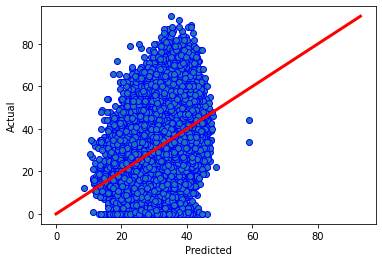

In [ ]:
#Overall

ml3 = data.copy()

ml3 = ml3.drop('genre', axis = 1)
ml3 = ml3.drop('artist_name', axis = 1)
ml3 = ml3.drop('track_name', axis = 1)
ml3 = ml3.drop('track_id', axis = 1)
ml3 = ml3.drop('time_signature', axis = 1)
ml3 = ml3.drop('key', axis = 1)
ml3 = ml3.drop('mode', axis = 1)



yo = ml3['popularity']
Xo = ml3.drop('popularity', axis = 1)

X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size = 0.30)

reg = LinearRegression()

#fitting the model with the training data
reg.fit(X_traino, y_traino)

#printing out parameters
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

#predict based on testing data
y_preo = reg.predict(X_testo)

#calculate coefficient of determination 
scre_o = r2_score(y_testo, y_preo)

#calculate MAE
mae_o = mean_absolute_error(y_testo, y_preo)


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmse_o = np.sqrt(mean_squared_error(y_testo, y_preo))

print("")
print("R^2 Score: ", scre_o)
print("MAE: ", mae_o)
print("RMSE: ", rmse_o)

#plot
fig, ax = plt.subplots()
ax.scatter(y_preo, y_testo, edgecolors=(0, 0, 1))
ax.plot([y_testo.min(), y_testo.max()], [y_testo.min(), y_testo.max()], 'r', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

For this overall regression model, we see again that our coefficient of determination (R^2 value) is very low. We also again see that our RMSE value is very large. This again means that the linear regression model is a bad fit and would not do a good job predicting popularity based on audio features. We also see that the MAE (mean absolute error) is around 11.5. The MAE is the absolute difference between the target value and the value predicted by the model. This is a pretty high value which again means the linear regression model is not a good fit. 
 
Looking at this final graph, we can see that the data does not have a standard linear spread, and so when the regression line is plotted on top, it seems almost out of place. The red line is supposed to theoretically show the direction in which the data goes, however due to the way the data is plotted on the graph, or how it is spread on the graph, the line is not representative of the actual spread and another approach could possibly work better than using this type of prediction method.

What we found was that the linear regression model we created was not actually able to predict popularity well. We are able to see this throughout the different models we created based on key relationships, and the overall model we created. We are able to determine this based on having our model learn on a section of test data, and then testing it on our test data.  We found that it underperformed in the key regression model metrics that are used to evaluate the performance. 


**LINEAR REGRESSION (VALENCE)**

First, we are going to look at the relationship we saw betweem danceability and valence along with the interaction variables energy and loudness.

In [ ]:
ml4 = data.copy()
yvd = ml4['valence']
Xvd = ml4.drop('valence', axis = 1)

X_trainvd, X_testvd, y_trainvd, y_testvd = train_test_split(Xvd, yvd, test_size = 0.3)
X_trainvd = X_trainvd.assign(valence = y_trainvd)

#fitting the model with the training data and interaction formula
valdinter_reg = smf.ols(formula = 'valence ~ danceability*energy*loudness', data = X_trainvd).fit()

print("Parameters: ", valdinter_reg.params)

#predict based on testing data
valdint_y_pre = valdinter_reg.predict(X_test)

#calculate coefficient of determination 
rsquvd = valdinter_reg.rsquared


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmsevd = np.sqrt(mean_squared_error(y_testvd, valdint_y_pre))

print("RMSE: ", rmsevd)
print("Coefficient of Determination (R^2): ", rsquvd)

Parameters:  Intercept                      -0.071641
danceability                    0.669067
energy                          0.399550
danceability:energy            -0.198716
loudness                       -0.000556
danceability:loudness          -0.003365
energy:loudness                 0.022439
danceability:energy:loudness   -0.035628
dtype: float64
RMSE:  0.33035415207494967
Coefficient of Determination (R^2):  0.4458342164214938


Right off the bat, we see a much higher coefficient of determination in comparison to the ones we saw in the linear regression models for popularity (higher than 0.4 in comparison to the others being around 0.1). While it is still not very high, it does mean that the model is at least accounting for a good portion of the variance we see in the data. The RMSE is also around 0.33 which is notably lower than some of the others. This makes it clear that this model does have a lower squared difference between the target value and the predicted value. This again means that this is a much better model than the ones we looked at for popularity. Thus, this linear regression model using the interaction between danceability, loudness, and energy to predict valence is a somewhat decent representation, though not fantastic. 

We are now going to look at the overall model. We will use all the essential audio features to create a model.

Coefficients:  [-2.06246099e-03  9.12038256e-02  7.83826058e-01 -1.19786941e-07
  4.30689225e-01 -8.65686062e-02 -2.12249855e-02 -5.60625370e-03
 -2.29539892e-01  6.46783130e-04]
Intercept:  -0.22812521094169558
R^2 Score:  0.4983129139885716
MAE:  0.1559378710554214
RMSE:  0.19464130039848968


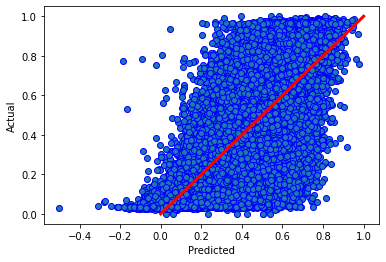

In [ ]:
ml5 = data.copy()

ml5 = ml5.drop('genre', axis = 1)
ml5 = ml5.drop('artist_name', axis = 1)
ml5 = ml5.drop('track_name', axis = 1)
ml5 = ml5.drop('track_id', axis = 1)
ml5 = ml5.drop('time_signature', axis = 1)
ml5 = ml5.drop('key', axis = 1)
ml5 = ml5.drop('mode', axis = 1)


yvo = ml5['valence']
Xvo = ml5.drop('valence', axis = 1)

X_trainvo, X_testvo, y_trainvo, y_testvo = train_test_split(Xvo, yvo, test_size = 0.30)

regvo = LinearRegression()

#fitting the model with the training data
regvo.fit(X_trainvo, y_trainvo)

#printing out parameters
print("Coefficients: ", regvo.coef_)
print("Intercept: ", regvo.intercept_)

#predict based on testing data
y_prevo = regvo.predict(X_testvo)

#calculate coefficient of determination 
screvo = r2_score(y_testvo, y_prevo)

#calculate MAE
maevo = mean_absolute_error(y_testvo, y_prevo)


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmsevo = np.sqrt(mean_squared_error(y_testvo, y_prevo))

print("R^2 Score: ", screvo)
print("MAE: ", maevo)
print("RMSE: ", rmsevo)

#plot
fig, ax = plt.subplots()
ax.scatter(y_prevo, y_testvo, edgecolors=(0, 0, 1))
ax.plot([y_testvo.min(), y_testvo.max()], [y_testvo.min(), y_testvo.max()], 'r', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

For this overall regression model, we see again that our coefficient of determination (R^2 value) is somewhat high (around 0.5). We also again see that our RMSE value is pretty low (around 0.19-0.2). This again means that the linear regression model is a somewhat decent b fit and would do maybe an okay job predicting valence based on audio features. We also see that the MAE (mean absolute error) is around 0.15. The MAE is the absolute difference between the target value and the value predicted by the model. This is a pretty low value which again means that the linear regression model is a decent fit.

Looking at this final graph, we can see that there is an abundance of data which means there is a lot of noise. The regression line is plotted on top and seems to follow the general trend of the data. Also it is good to see that the data is in general clustered around the line. 

What we found was that the linear regression model we created was a decent representation of this data and was able to somewhat predict valence based on audio features.  We are able to see this throughout the different models we created based on key relationships, and the overall model we created. We are able to determine this based on having our model learn on a section of test data, and then testing it on our test data.  

#**8. Machine Learning: Decision Trees**

**Decision Tree**

A decision tree is a representation of data in a form where options can be viewed in consequence with cause and effect. In its visual representation, decision trees show the full set of paths and options for paths given a starting point. In certain cases, weights can also be assigned to paths to optimize for efficiency and effectiveness. The primary goal is to depict decision processing and in this, show all possible outcomes. We have again deciced to create different decision trees. One to predict populariyt and the other for valence. We decided to create two overall ones (one for each). 

Here are some additional resources and documentation that you might want to familiarize yourself:
https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sklearn

**DECISION TREES (POPULARITY)**

In [ ]:
ml6 = data.copy()

ml6 = ml6.drop('genre', axis = 1)
ml6 = ml6.drop('artist_name', axis = 1)
ml6 = ml6.drop('track_name', axis = 1)
ml6 = ml6.drop('track_id', axis = 1)
ml6 = ml6.drop('time_signature', axis = 1)
ml6 = ml6.drop('key', axis = 1)
ml6 = ml6.drop('mode', axis = 1)

#split the data

ypdt = ml6['popularity']
Xpdt = ml6.drop('popularity', axis = 1)

X_trainpdt, X_testpdt, y_trainpdt, y_testpdt = train_test_split(Xpdt, ypdt, test_size = 0.30)

#initilize the tree with a maxdepth of 10
pdttree = DecisionTreeRegressor(max_depth = 10)

#fit the model with the training data
pdttree.fit(X_trainpdt, y_trainpdt)

#predict based on testing data
y_prepdt = pdttree.predict(X_testpdt)

#calculate coefficient of determination 
screpdt = r2_score(y_testpdt, y_prepdt)


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmsepdt = np.sqrt(mean_squared_error(y_testpdt, y_prepdt))


print("R^2 Score: ", screpdt)
print("RMSE: ", rmsepdt)

R^2 Score:  0.21986564169066825
RMSE:  14.146147893563858


This is reflective of what we saw in the popularity linear regression model. A low R^2 value and a high RMSE. This again therefore suggests that this model is not a good fit. 

**DECISION TREES (VALENCE)**

In [ ]:
ml7 = data.copy()

ml7 = ml7.drop('genre', axis = 1)
ml7 = ml7.drop('artist_name', axis = 1)
ml7 = ml7.drop('track_name', axis = 1)
ml7 = ml7.drop('track_id', axis = 1)
ml7 = ml7.drop('time_signature', axis = 1)
ml7 = ml7.drop('key', axis = 1)
ml7 = ml7.drop('mode', axis = 1)

#split the data
yvdt = ml7['valence']
Xvdt = ml7.drop('valence', axis = 1)

X_trainvdt, X_testvdt, y_trainvdt, y_testvdt = train_test_split(Xvdt, yvdt, test_size = 0.30)

#initilize the tree with a maxdepth of 10
vdtree = DecisionTreeRegressor(max_depth = 10)

#fit the model with the training data
vdtree.fit(X_trainvdt, y_trainvdt)

#predict based on testing data
y_prevdt = vdtree.predict(X_testvdt)

#calculate coefficient of determination 
screvdt = r2_score(y_testvdt, y_prevdt)


#compute Root Mean Square Error (RMSE) -- the standard deviation of the residuals
rmsevdt = np.sqrt(mean_squared_error(y_testvdt, y_prevdt))


print("R^2 Score: ", screvdt)
print("RMSE: ", rmsevdt)

R^2 Score:  0.527772850005853
RMSE:  0.1886848895572946


This is similar to the results we got from the valence linear regression model. However, it does seem to be performing slighlty better. The R^2 value is a bit higher and the RMSE is very slightly lower. This again appears to be a somewhat decent model for valence. 

The decision tree that looks at valence is more accurate than that of popularity because when we look at the results, it can be seen that the coefficient and the RMSE are more accurate for the valence whereas this is not the case for popularity. This decision tree actually showed the highest coefficient of any of the models, showing the power of the decision tree given the right circumstances. Decision trees are optimal for looking at the likelihood of all possible outcomes, so it makes sense that in this particular usage, it would be able to use the valence data to create a good chance at correct prediction. Popularity it seems is more difficult to predict, due to the vast number of variables and components that go into something being “popular” that we can see that popularity itself is not something that is easily quantifiable or predictable mathematically.

#**9. Conclusion**


As the entertainment industry continues to evolve into something entirely different from what we know now, we will see more and more uses of prediction software to best optimize for business growth and profit. While it is up to interpretation to determine if this is really something that is good or bad for the music industry and art in general, our data was able to provide some fascinating conclusions nonetheless that show that the future may not be as cut and dry as software predicting what music will make the next best hit.

We found that popularity is rather difficult to predict when it comes to music. So many genres and artists that can move between genres as well as trends changing in such different ways makes it difficult to determine what will be next to take over the charts. Thankfully, the Spotify API has a lot of insight into what attributes a song has, including things we would not have thought of like danceability or acousticness. Using this and learning about how they are scaled for comparison with other songs, we were able to create models in accordance. 
	
While some relationships could be found, and valence in particular seemed to be fairly predictable, the correlations with popularity remained difficult through trial and error. While we are sure Spotify has a way of predicting to some extent where popularity will go, it is not very simple and it clearly is not something that can be represented as an algorithm of just a few variables. For example, we do not know the prevalence and success rate of A&R when it comes to the effect on popularity or how Spotify itself plays a role in promoting artists. 

While many think that using software to create the next trends in music is a regression in the industry, it is not necessarily inevitable. Unique artistic expression clearly still has its place in creating popularity. The fact that predictability of popularity is not as easy as it seems when it comes to music means that we will continue to see unique new takes on genres move forward and become popular to set new precedents. Given more time, we also would want to think about what new medium could replace that of music streaming, and how that could impact trends in the music industry. Hopefully our tutorial can provide some insight into the streaming music industry and the music industry as a whole a bit more to others, but regardless we definitely gained a lot from this tutorial ourselves.
